# Bike-sharing system Assignment DSC52  - Dhara Khamar

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings an importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Importing data using the pandas library

In [2]:
# reading bike sharing dataset
bike_sharing = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding the structure of the data

In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations: 
- dataset has 730 rows and 16 variables
- there is no null values present in any of the column
- there is only one column with object type all the others are either int or float type
- We will analyse and finalize whether to convert them to categorical or treat as integer.

## Step 2: Visualising the Data

### Visualising Numeric Variables

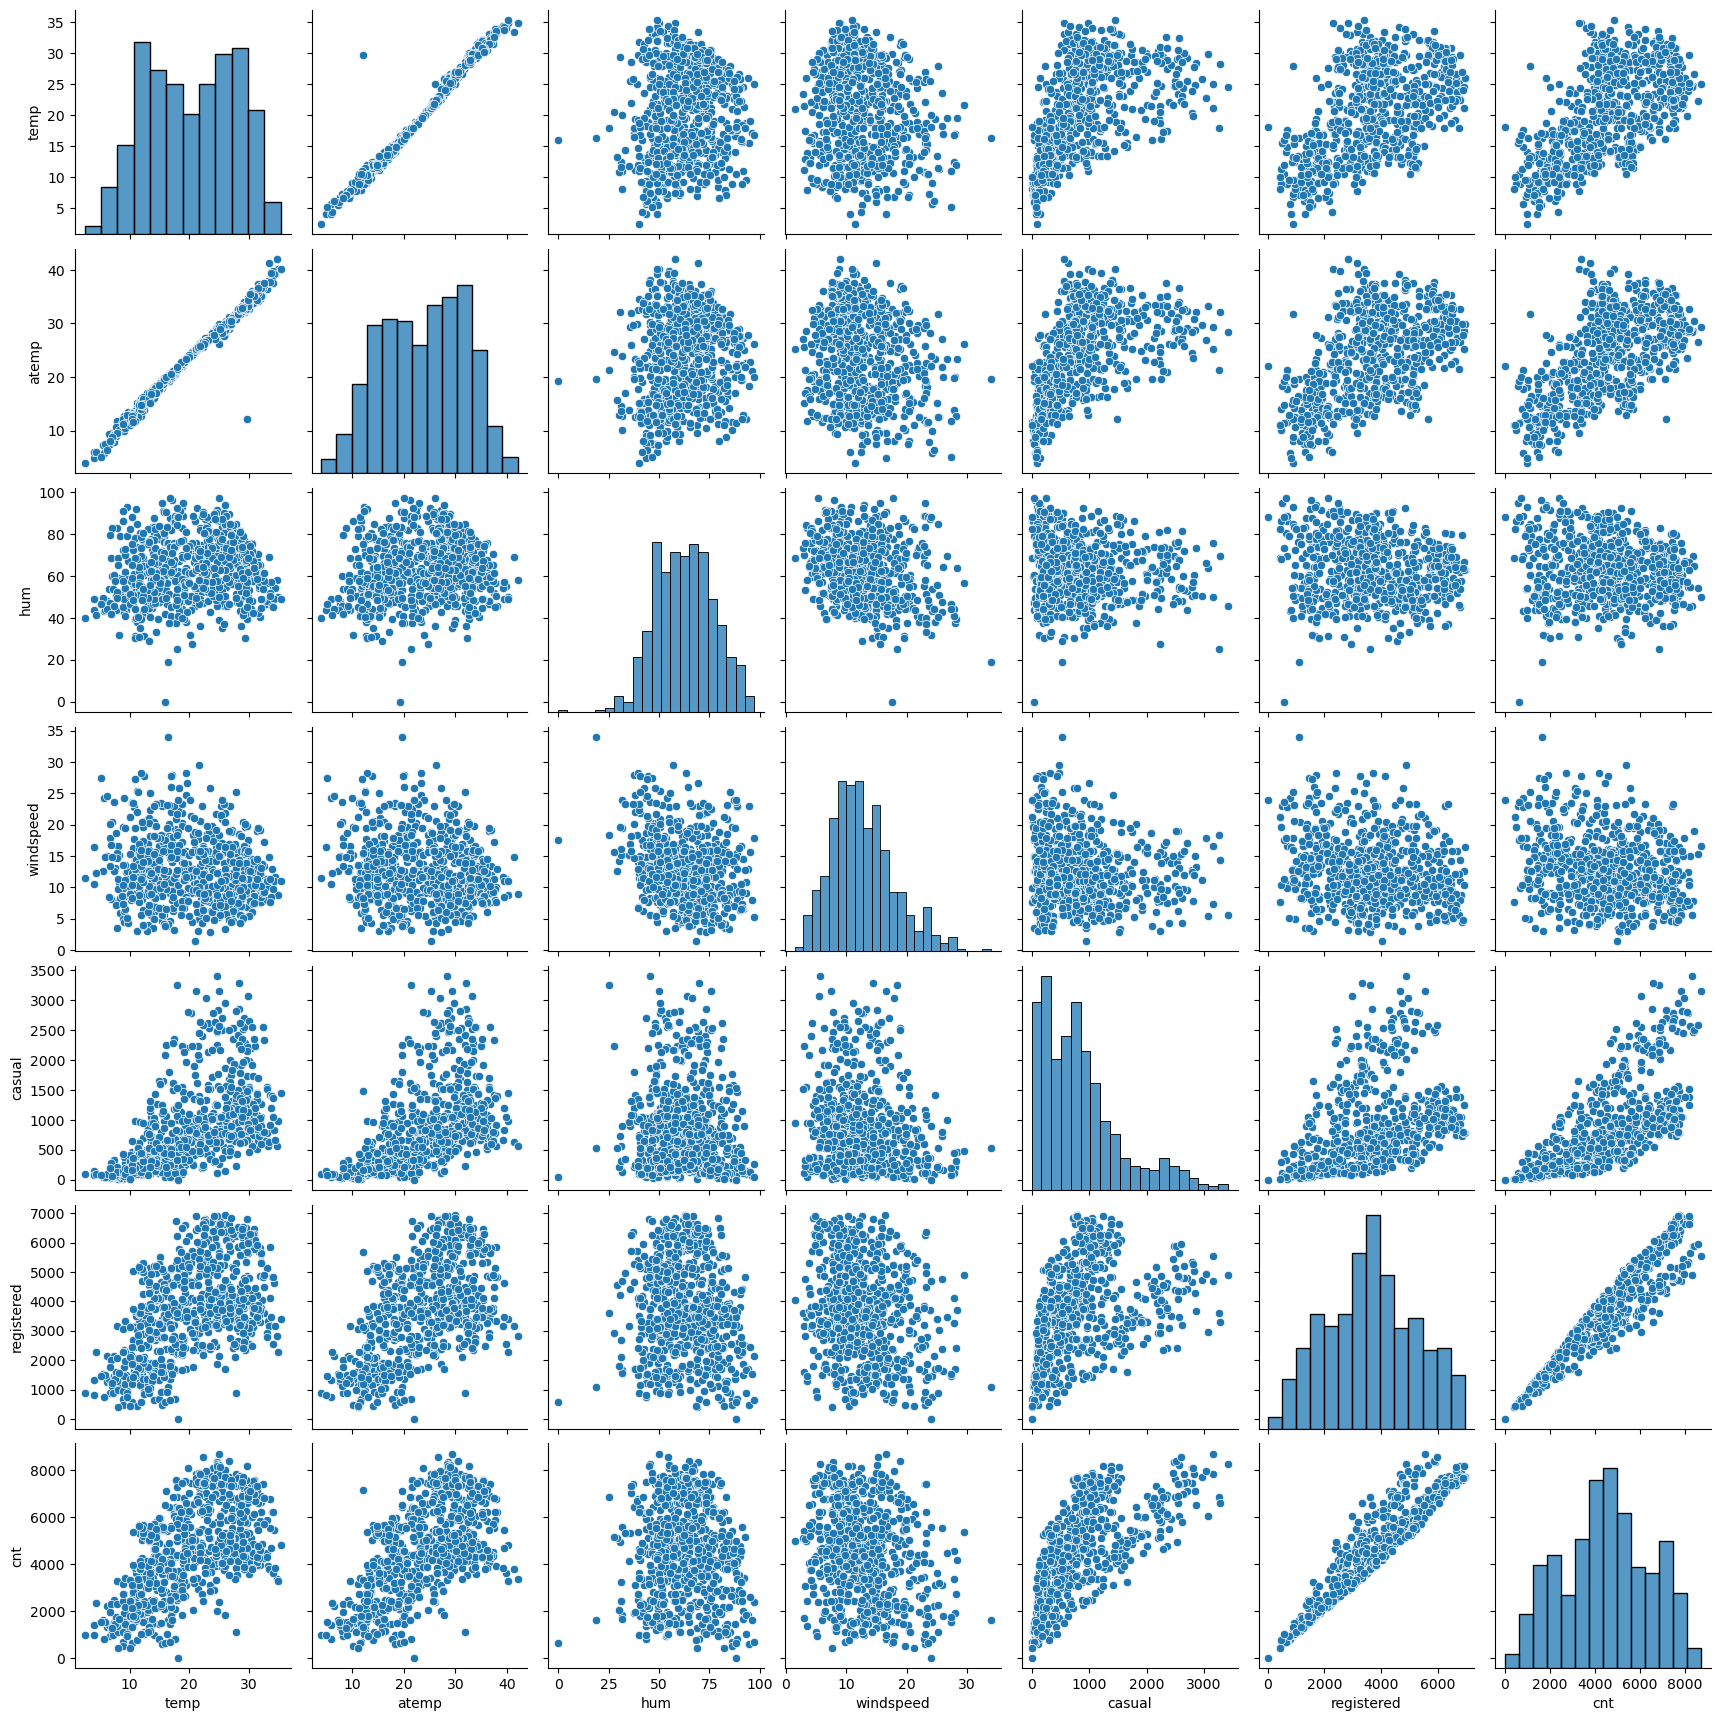

In [7]:
# lets make a pair plot for numerical variables
sns.pairplot(bike_sharing[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

### Observations:
- temp and atemp are highly correlated.
- temp is also correlated with casual, registered and cnt.
- atemp is also correlated with casual, registered and cnt.

### Visualising Categorical Variables

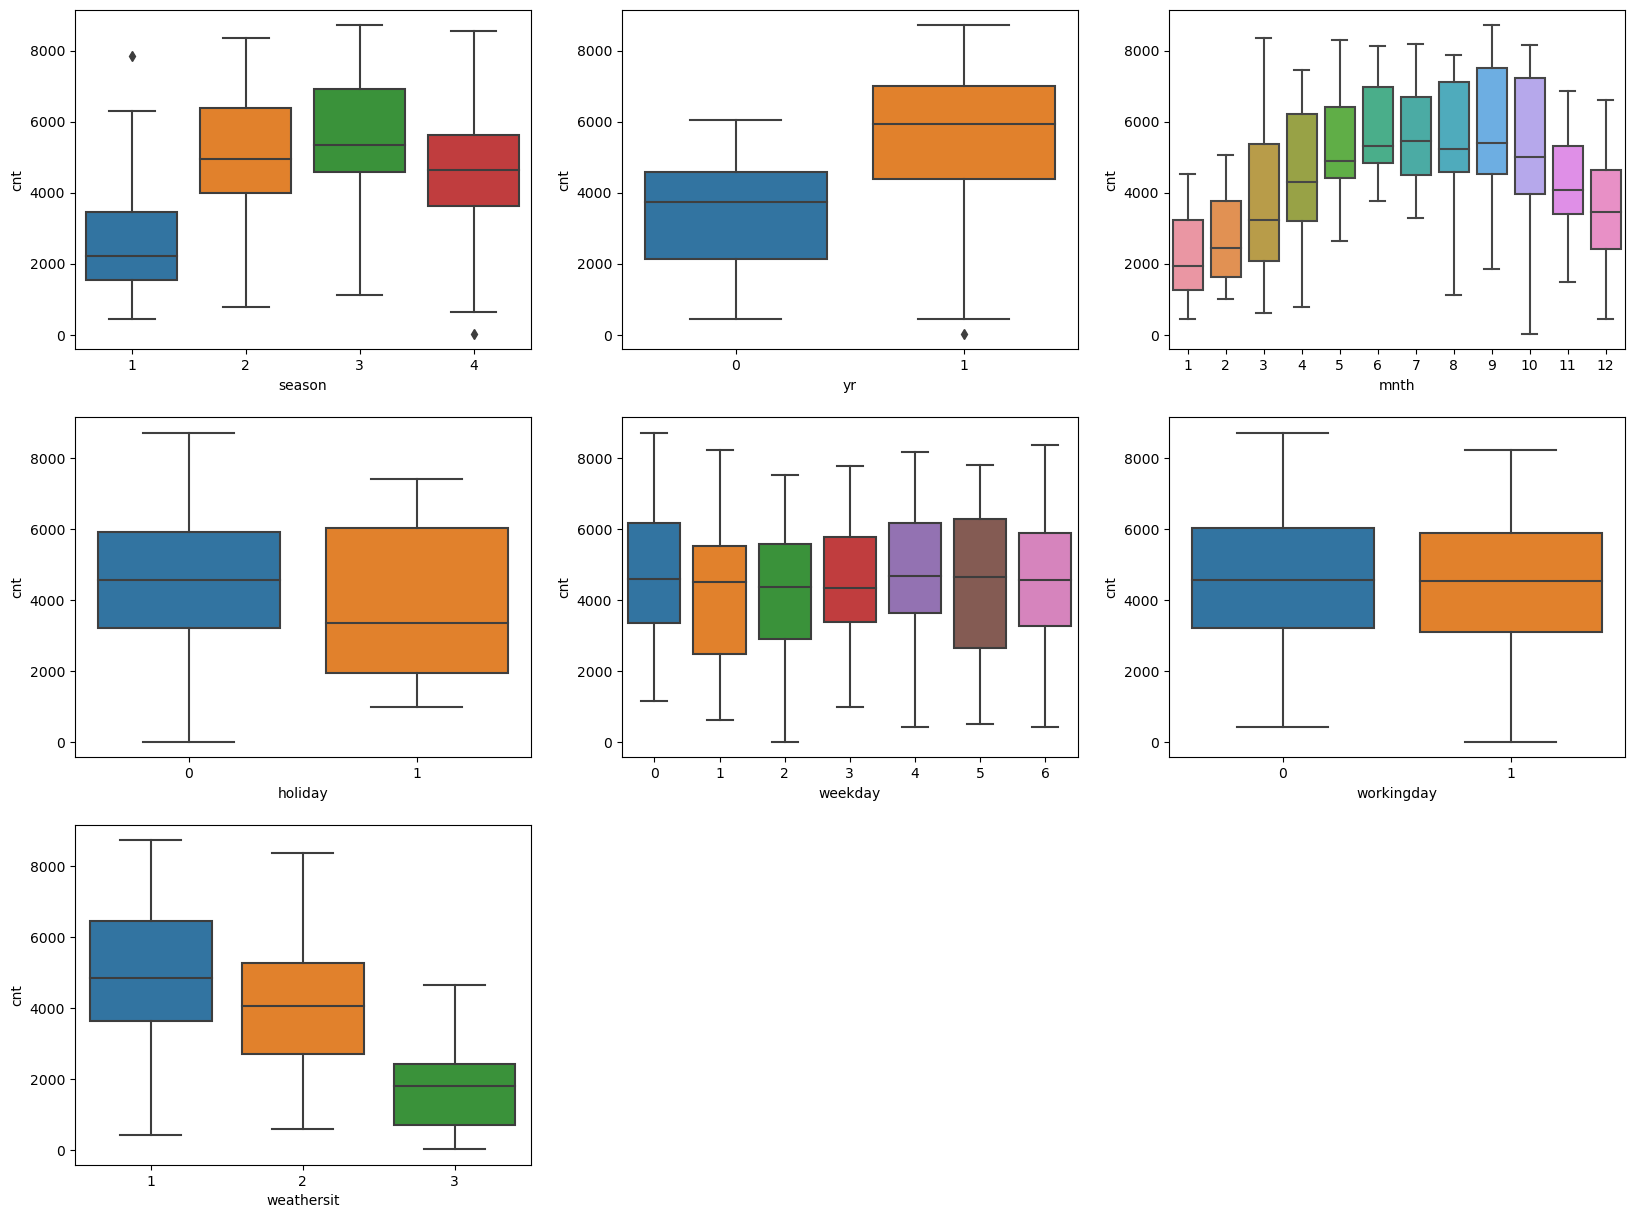

In [8]:
# Lets make a boxplot for categorical variables.

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

### Observations: 
- median is high for season summur and fall compared to ohter two seasons. 
- ther are some outliers present in spring season.
- Median of bike rental count is highest for year 2019. Also maximum bike rental count is for year 2019.
- median for months is increasing from starting of the year till mid year and then again decreasing. 
- max rental count is in the month september.
- rental count is more on holidays compared to working day.
- median is almost same for all the days of week. 
- rental count is very low for rainy days.

## Step 3: Data Preparation

- Data Cleaning:
    1. Null value check
    2. Duplicate entries check
- Data Mapping
- Creating Dummy Variables

### Null values check

In [9]:
# percentage of missing values in each column
round(100*(bike_sharing.isnull().sum()/len(bike_sharing)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Observations: 
- There are no missing / Null values either in columns or rows

### Duplicate entries check

In [10]:
bike_sharing_temp = bike_sharing.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_sharing_temp.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_sharing_temp.shape

(730, 16)

In [12]:
bike_sharing.shape

(730, 16)

### Observations: 
- The shape after running the drop duplicate command is same as the original dataframe.
- Hence we can conclude that there were zero duplicate values in the dataset.

### Data Mapping 

In [13]:
# Defining the map function for season variable
def map_season_var(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Defining the map function for weather situation variable
def map_weathersit_var(x):
    return x.map({1:"weathersit_1", 2:"weathersit_2", 3:"weathersit_3", 4:"weathersit_4"})


In [14]:
# Applying the map function to the season column
bike_sharing[["season"]] = bike_sharing[["season"]].apply(map_season_var)

# Applying the map function to the weathersit column
bike_sharing[["weathersit"]] = bike_sharing[["weathersit"]].apply(map_weathersit_var)

In [15]:
# Check the bike_sharing dataframe now
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Defining the map function for month variable
def map_month_var(val):
    return val.map({1:"month_1", 2:"month_2", 3:"month_3", 4:"month_4",
                  5:"month_5", 6:"month_6", 7:"month_7", 8:"month_8",
                  9:"month_9", 10:"month_10", 11:"month_11",12:"month_12"})

# Defining the map function for weekday variable
def map_weekday_var(val):
    return val.map({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})

In [17]:
# Applying the map function to the month column
bike_sharing[["mnth"]] = bike_sharing[["mnth"]].apply(map_month_var)

# Applying the map function to the weekday column
bike_sharing[["weekday"]] = bike_sharing[["weekday"]].apply(map_weekday_var)

In [18]:
# Check the bike_sharing dataframe now
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,month_1,0,Tuesday,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,month_1,0,Wednesday,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,month_1,0,Thursday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,month_1,0,Friday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,month_1,0,Saturday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating Dummy Variables

- Create Dummy variable
- Drop first dummy variable for each set of dummies created
- Drop original variable for which the dummy was created

In [19]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy_var'
season_dummy_var = pd.get_dummies(bike_sharing['season'])

In [20]:
# Check what the dataset 'season_dummy_var' looks like
season_dummy_var.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [21]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy_var'
weathersit_dummy_var = pd.get_dummies(bike_sharing['weathersit'])

In [22]:
# Check what the dataset 'weathersit_dummy_var' looks like
weathersit_dummy_var.head()

,weathersit_1,weathersit_2,weathersit_3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month_dummy_var'
month_dummy_var = pd.get_dummies(bike_sharing['mnth'])

In [24]:
# Check what the dataset 'month_dummy_var' looks like
month_dummy_var.head()

,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy_var'
weekday_dummy_var = pd.get_dummies(bike_sharing['weekday'])

In [26]:
# Check what the dataset 'weekday_dummy_var' looks like
weekday_dummy_var.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [27]:
# Let's drop the first column from dummy variable dataframes using 'drop_first = True'

season_dummy_var = pd.get_dummies(bike_sharing['season'], drop_first = True)
weathersit_dummy_var = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)
month_dummy_var = pd.get_dummies(bike_sharing['mnth'], drop_first = True)
weekday_dummy_var = pd.get_dummies(bike_sharing['weekday'], drop_first = True)

In [28]:
# Add the results to the original bike_sharing dataframe

bike_sharing = pd.concat([bike_sharing, season_dummy_var, weathersit_dummy_var, 
                          month_dummy_var,weekday_dummy_var], axis = 1)

In [29]:
# Now let's see the head of our dataframe.

bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,spring,0,month_1,0,Tuesday,1,weathersit_2,14.110847,...,0,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,spring,0,month_1,0,Wednesday,1,weathersit_2,14.902598,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,spring,0,month_1,0,Thursday,1,weathersit_1,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,month_1,0,Friday,1,weathersit_1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,month_1,0,Saturday,1,weathersit_1,9.305237,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Drop original columns as we have created the dummies for it

bike_sharing.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

In [31]:
bike_sharing.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# Removing redundant & unwanted columns
drop_columns = ["instant",
                "dteday",
                "casual",
                "registered"]

bike_sharing.drop(drop_columns, inplace=True, axis=1)

In [33]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
bike_sharing.shape

(730, 30)

In [35]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   spring        730 non-null    uint8  
 9   summer        730 non-null    uint8  
 10  winter        730 non-null    uint8  
 11  weathersit_2  730 non-null    uint8  
 12  weathersit_3  730 non-null    uint8  
 13  month_10      730 non-null    uint8  
 14  month_11      730 non-null    uint8  
 15  month_12      730 non-null    uint8  
 16  month_2       730 non-null    uint8  
 17  month_3       730 non-null    uint8  
 18  month_4       730 non-null    

### Observations:
- After creating dummy variables and removing unwanted columns total 730 rows and 30 variables are present in dataset.

## Step 4: Splitting the Data into Training and Testing Sets

- Divide data into train and test datasets
- Rescaling the features
- EDA on train dataset
- Dividing into X and Y sets for the model building

### Divide data into train and test datasets

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_share_train, bike_share_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
bike_share_train.shape

(510, 30)

In [38]:
bike_share_test.shape

(219, 30)

### Rescaling the Features

In [39]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables

scale_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_share_train[scale_vars] = scaler.fit_transform(bike_share_train[scale_vars])

In [41]:
bike_share_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,0


In [42]:
bike_share_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.074510,0.076471,0.096078,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.262857,0.266010,0.294988,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### EDA on train dataset

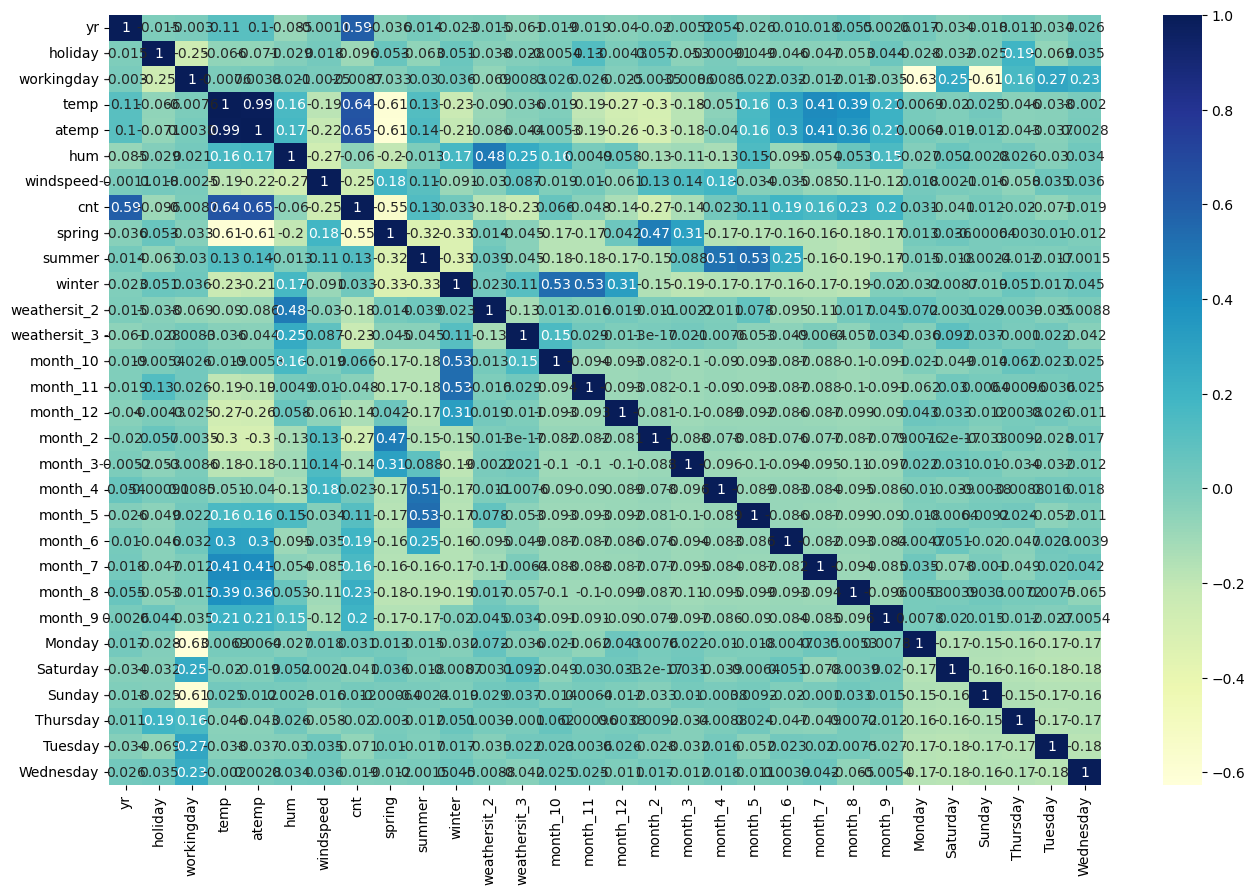

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_share_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

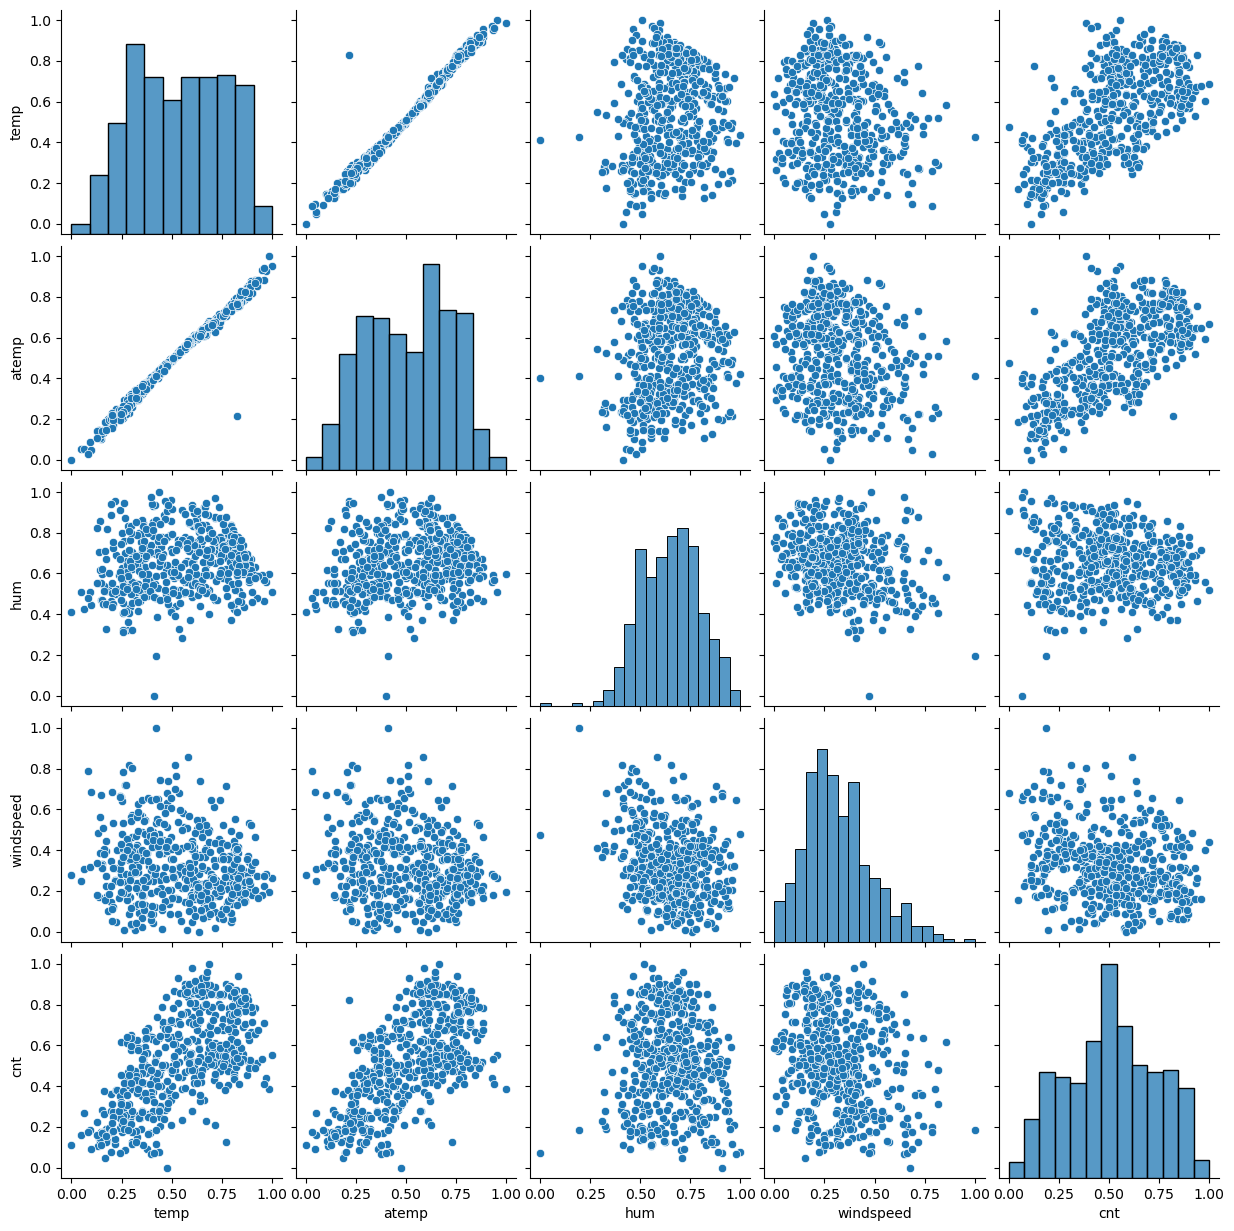

In [44]:
# lets make a pair plot for numerical variables
sns.pairplot(bike_share_train[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

### Observations: 
- atemp is having highest correlation coefficient with cnt followed by temp.
- yr is also corrleated with cnt. It can be a contributing factor.
- mnth correlation coefficient is on low side. We need to check this statistically. It might be the case that only few months are statistically significant from model perspective.
- Similarly need to check the statistical significance for weekday, workingday, weathersit, hum and windspeed.

### Dividing into X and Y sets for the model building

In [45]:
bike_share_y_train = bike_share_train.pop('cnt')
bike_share_X_train = bike_share_train

In [46]:
bike_share_y_train.shape

(510,)

In [47]:
bike_share_X_train.shape

(510, 29)

## Step 5: Building a linear model

## RFE (Recursive feature elimination) 
- we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(bike_share_X_train, bike_share_y_train)
rfe = RFE(lm, n_features_to_select=15)
#rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(bike_share_X_train, bike_share_y_train)

In [50]:
list(zip(bike_share_X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 12),
 ('month_12', False, 13),
 ('month_2', False, 10),
 ('month_3', True, 1),
 ('month_4', False, 2),
 ('month_5', True, 1),
 ('month_6', False, 3),
 ('month_7', False, 11),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 15),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 8)]

In [51]:
col = bike_share_X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'weathersit_2', 'weathersit_3', 'month_10', 'month_3',
       'month_5', 'month_8', 'month_9'],
      dtype='object')

In [52]:
bike_share_X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_11', 'month_12', 'month_2', 'month_4',
       'month_6', 'month_7', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [53]:
## Model 1: Linear model building with RFE selected varibles

In [54]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = bike_share_X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm_1 = sm.OLS(bike_share_y_train,X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.95e-189
Time:                        16:31:20   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2812      0.036      7.826   

### VIF check for model

In [55]:
# Calculate the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.01
6,spring,6.17
8,winter,4.81
7,summer,3.85
3,temp,3.84
4,hum,1.94
14,month_8,1.68
9,weathersit_2,1.56
13,month_5,1.56
11,month_10,1.52


### Observations:
- R - squared value is pretty good 0.846
- month_5 and month_3 are having high P-value of 0.087 and 0.024 respectively, Hence they are less significant.
- VIF values for seasons spring and winter are high and so we can conclude that there is multicolinearity. 
- lets build a new model by removing month_5 variable.

## Model 2: Dropping 'month_5' variable

In [56]:
# Dropping month_5 variable 
X_train_new = X_train_rfe.drop(["month_5"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

# Running the linear model
lm_2 = sm.OLS(bike_share_y_train,X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 30 May 2023   Prob (F-statistic):          9.02e-190
Time:                        16:31:20   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2687      0.035      7.622   

### VIF Check for model

In [57]:
# Calculate the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.66
6,spring,5.97
8,winter,4.75
3,temp,3.72
7,summer,3.13
4,hum,1.91
13,month_8,1.68
9,weathersit_2,1.56
11,month_10,1.52
14,month_9,1.40


### Observations:
- P-value for spring season is very high 0.106
- VIF value for spring is also very high 5.97 
- its better to drop spring variable and build model once again.

## Model 3: Dropping 'Spring' variable

In [58]:
# Dropping spring variable
X_train_new = X_train_rfe.drop(["spring"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

# Running the linear model
lm_3 = sm.OLS(bike_share_y_train,X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.26e-190
Time:                        16:31:21   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2324      0.027      8.529   

### VIF Check for model

In [59]:
# Calculate the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.84
4,hum,1.87
7,winter,1.79
3,temp,1.62
8,weathersit_2,1.56
10,month_10,1.49
12,month_8,1.46
6,summer,1.38
13,month_9,1.25
9,weathersit_3,1.24


### Observations:
- P-value for month_3 is 0.093 so its less significant compared to other variables
- VIF values for all the variables seems to be fair 
- lets remove month_3 and build the linera regression model again.

## Model 4: Dropping month_3 variable

In [60]:
X_train_new = X_train_rfe.drop(["month_3"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

# Running the linear model
lm_4 = sm.OLS(bike_share_y_train,X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          6.02e-191
Time:                        16:31:21   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.848   

### VIF Check for model

In [61]:
# Calculate the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.87
4,hum,1.87
7,winter,1.72
3,temp,1.59
8,weathersit_2,1.56
10,month_10,1.49
11,month_8,1.45
6,summer,1.38
9,weathersit_3,1.24
12,month_9,1.24


### Observations: 
- less significant variable is month_10 as it is having P-value of 0.026
- lets remove that variable and check again if model is behaving better or not.

## Model 5: Dropping month_10 variable

In [62]:
X_train_new = X_train_rfe.drop(["month_10"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_5 = sm.OLS(bike_share_y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.43e-191
Time:                        16:31:21   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2317      0.027      8.607   

### VIF Check for model

In [63]:
# Calculate the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.18
4,hum,1.86
8,weathersit_2,1.56
3,temp,1.54
10,month_8,1.44
6,summer,1.37
7,winter,1.32
9,weathersit_3,1.23
11,month_9,1.21
5,windspeed,1.18


### Observations:
- P-values for all the variables seem to be fair and all the variables are significant to predict the dependent variable.
- VIF values are also seems valid for all the independent variables 
- Lets conclude that the current model 5 is our final model for the predictions of our independent variable cnt.
- R-Squared value 0.841 and adjusted R-Squared value is 0.838.
- All VIFs are now below 5.
- All p-values are below 0.05 (Rejecting the NULL hypothesis)

In [64]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'weathersit_2', 'weathersit_3', 'month_8', 'month_9'],
      dtype='object')

In [65]:
X_train_new = X_train_new.drop(['const'], axis=1)

## Step 6: Residual Analysis of the train data

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [66]:
y_train_cnt = lm_5.predict(X_train_lm)

In [67]:
## Looking at the RMSE

from sklearn.metrics import mean_squared_error

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(bike_share_y_train, y_train_cnt))

0.08936419434164344

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

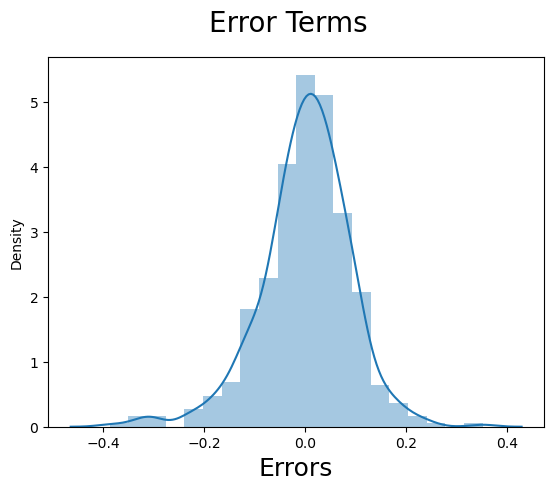

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((bike_share_y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Looking for patterns in the residuals

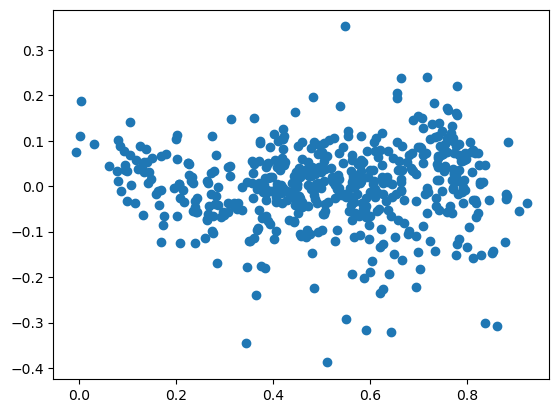

In [70]:
plt.scatter(y_train_cnt,(bike_share_y_train - y_train_cnt))
plt.show()

### Observations:
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.
- The residuals are following the normally distributed with a mean 0.

## Step 7: Making Predictions Using the Final Model

- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Fifth model.

### Applying the scaling on the test sets

In [71]:
scale_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_share_test[scale_vars] = scaler.transform(bike_share_test[scale_vars])

### Dividing Test dataset into X_test and y_test

In [72]:
y_test = bike_share_test.pop('cnt')
X_test = bike_share_test

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [74]:
# Making predictions
y_test_pred = lm_5.predict(X_test_new)

In [75]:
y_test_pred

184    0.399159
535    0.913948
299    0.393071
221    0.623456
152    0.621654
         ...   
400    0.367386
702    0.703597
127    0.522791
640    0.802914
72     0.283134
Length: 219, dtype: float64

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

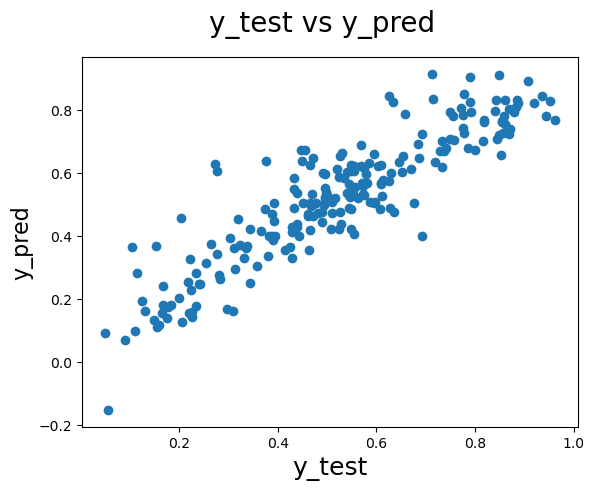

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'cnt')

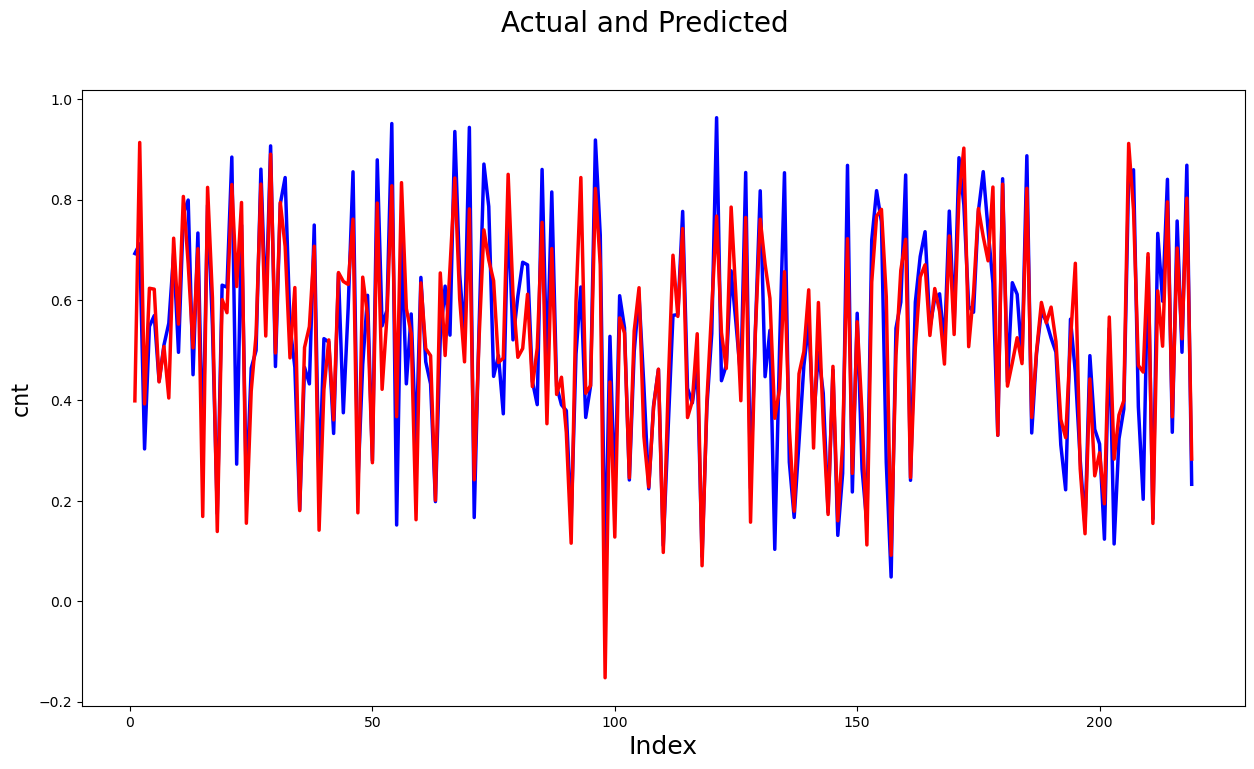

In [77]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(15, 8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16) 

### We can see that the equation of our best fitted line is:

cnt = 0.2317 + yr * 0.2286 - holiday * 0.0958 + temp * 0.5395 - hum * 0.1759 - windspeed * 0.1835 + summer * 0.1030 + winter * 0.1482 - weathersit_2 * 0.0544 - weathersit_3 * 0.2351 + month_8 * 0.0553 + month_9 * 0.1222 

## Step 9: Checking the R-squared and Adjusted R-squared on the test set

In [78]:

from sklearn.metrics import r2_score

In [79]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09634550671251717

In [80]:
R2 = r2_score(y_test, y_test_pred)
R2

0.8045626124663317

In [81]:
adjusted_R2 = 1-(1-R2)*(219-1)/(219-11-1)
adjusted_R2

0.7941770508099532

## Conclusion: 

In [82]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.43e-191
Time:                        16:31:21   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2317      0.027      8.607   

In [83]:
summary_Bike_sharing = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.841,0.838,0.08936],
                         "Test Set":[0.8045,0.79417,0.09634]})

In [84]:
summary_Bike_sharing

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.84100,0.80450
1,Adjusted R-Squared Value,0.83800,0.79417
2,RMSE,0.08936,0.09634


## Statistically significant and important predictor variables are as follows:
   - hum	
   - weathersit_2
   - temp
   - month_8
   - summer	
   - winter	
   - weathersit_3	
   - month_9	
   - windspeed	
   - yr	
   - holiday

- As per our final Model, the top 3 predictor variables that influences the bike booking are:

   - Temperature (temp) - A coefficient value of ‘0.5395’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5395 units.
   - Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2351’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2351 units.
   - Year (yr) - A coefficient value of ‘0.2286 ’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2286  units.